<a href="https://colab.research.google.com/github/mukul-mschauhan/GenerativeAI/blob/main/Introduction_to_AI_Agents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1></h1></center>
<h1><left><font size=5>Introduction to AI Agents </font></left></h1>

## Teaching flow (exactly as you described)
1) **Start with a basic LLM chat** (no tools)  
2) Add **one simple custom tool** (toy weather function)  
3) Add **Tavily Search** as a real-world tool  
4) Build a tiny **agent** that decides when to call tools

> Goal: Learners understand *what an agent is*, *what tools are*, and *why tools matter* — without getting stuck in code.

# 1) Install Dependencies (Colab)

Keep installs minimal. Only add what you will use.

- `langchain` + `langchain-openai` for the LLM wrapper
- `langgraph` for a simple ReAct-style agent
- `langchain-tavily` for web search tool (optional)

In [ ]:
# If you are on Google Colab, uncomment and run:
!pip -q install langchain langchain-openai langgraph langchain-tavily python-dotenv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.7/84.7 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.1/489.1 kB 12.6 MB/s eta 0:00:00


# 2) API Keys (OpenAI + Tavily)

In Colab:
- Left sidebar → **Secrets**
- Add:
  - `OPENAI_API_KEY`
  - `TAVILY_API_KEY` (only needed for the Tavily section)

You can also set them manually below.

In [ ]:
import os
from google.colab import userdata
openai_api_key = userdata.get('OPENAI_API_KEY')
openai_base_url = "https://aibe.mygreatlearning.com/openai/v1"

# 3) Step 1 — Basic LLM (Not an Agent yet)

A plain LLM chat is **NOT an agent**.
It can't take actions in the world. It only generates text.

In [ ]:
# Lets initiate the model...

from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model="gpt-4o-mini", temperature=0.7,
                 openai_api_key=openai_api_key,
                 openai_api_base=openai_base_url)
llm.invoke("In one sentence, Whats the weather in UAE. Does it really get cold here because in India its winter season going on.").content

'The weather in the UAE is generally warm and dry, with mild temperatures in winter, but it does not get as cold as in many parts of India during the winter season.'

* The above that we see is not an AI Agent. Its a user interacting directly with LLMs so it can be termed as **GenAI Assistant**

* Now we will leverage tools because an AI Agent to work, we need tools to access information from outside world and LLMs take all the information and accomplishes the task.

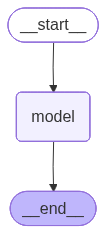

In [ ]:
# Lets create a basic Agent
from langchain.agents import create_agent
agent = create_agent(model = llm,
                     tools = [],
                     system_prompt = "You are a helpful assistant")

agent

# 4) Step 2 — Add One Custom Tool

A **tool** is just a function the agent can call.

We will create a simple tool:
- `get_weather(city)` returns a dummy answer

Why dummy? Because the goal is to teach the **idea of tool calling** first.

In [ ]:
from langchain_core.tools import tool

@tool
def get_weather(city: str) -> str:
    """Get the weather for a city (toy tool for teaching)."""
    return f"The weather in {city} is sunny."

# 5) Create a Small Agent (ReAct style) with the Custom Tool

Now it becomes an **agent**:
- It can decide to call the tool
- It can use the tool result to answer

We use `create_react_agent` from LangGraph for a clean beginner experience.

In [ ]:
from langgraph.prebuilt import create_react_agent
agent_basic_tool = create_react_agent(model=llm,
                                      tools=[get_weather])

/tmp/ipython-input-1311191635.py:2: LangGraphDeprecatedSinceV10: create_react_agent has been moved to `langchain.agents`. Please update your import to `from langchain.agents import create_agent`. Deprecated in LangGraph V1.0 to be removed in V2.0.
  agent_basic_tool = create_react_agent(model=llm,


## Try the agent

In [ ]:
result = agent_basic_tool.invoke(
    {"messages": [{"role": "user",
                   "content": "What is the weather in Abu Dhabi?"}]})

# Last message is the final answer
result["messages"][-1].content

'The weather in Abu Dhabi is sunny.'

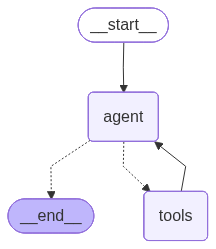

In [ ]:
agent_basic_tool

# 6) Step 3 — Add Tavily (Real Search Tool)

Now we introduce a **real tool**:
- TavilySearchResults can do web search (requires `TAVILY_API_KEY`)

This is where learners see the real power:
- the agent can fetch up-to-date info
- it can be grounded in external data

In [ ]:
# Setting Up Tavily
from langchain_tavily import TavilySearch
os.environ["TAVILY_API_KEY"] = userdata.get('TAVILY_API') # Corrected userdata key
tavily = TavilySearch(max_results=3)

/usr/local/lib/python3.12/dist-packages/langchain_tavily/tavily_research.py:97: UserWarning: Field name "output_schema" in "TavilyResearch" shadows an attribute in parent "BaseTool"
  class TavilyResearch(BaseTool):  # type: ignore[override, override]
/usr/local/lib/python3.12/dist-packages/langchain_tavily/tavily_research.py:97: UserWarning: Field name "stream" in "TavilyResearch" shadows an attribute in parent "BaseTool"
  class TavilyResearch(BaseTool):  # type: ignore[override, override]


# 7) Agent with Tavily Search Tool

In [ ]:
agent_search = create_react_agent(model=llm, tools=[tavily])

/tmp/ipython-input-2355923909.py:1: LangGraphDeprecatedSinceV10: create_react_agent has been moved to `langchain.agents`. Please update your import to `from langchain.agents import create_agent`. Deprecated in LangGraph V1.0 to be removed in V2.0.
  agent_search = create_react_agent(model=llm, tools=[tavily])


## Try: a query that benefits from search

In [ ]:
query = '''Can you give me brief of UAE Audit Regulations.
Also mention the official websites where I can access the PDFs or regulations.
Please make sure no blogs or any other website on the government website on regulations.'''

result = agent_search.invoke({"messages": [{"role": "user", "content": query}]})
print(result["messages"][-1].content)

### Brief Overview of UAE Audit Regulations

The UAE Audit Regulations are primarily governed by the **Federal Decree Law No. (41) of 2023**, which regulates the accounting and auditing profession in the country. This law outlines the framework for the practice of auditing and accounting, including definitions, competencies, and the roles of various authorities involved. Key provisions include:

1. **Definitions and Scope**: The law provides clear definitions of terms related to the auditing profession, such as "Chartered Accountant" and "Accounting Firm."
2. **Regulatory Authorities**: It establishes the roles of the Ministry of Economy and local authorities in overseeing the profession.
3. **Professional Standards**: The regulations mandate adherence to approved professional standards and ethical guidelines.
4. **Appointment and Responsibilities of Auditors**: Guidelines for the appointment of statutory auditors, including requirements for UAE national participation, are included.
5.

In [ ]:
query = '''Whats the weather in Abu Dhabi Right Now?'''

result = agent_search.invoke({"messages": [{"role": "user", "content": query}]})
print(result["messages"][-1].content)

The current weather in Abu Dhabi is as follows:

- **Temperature:** 23.2°C (73.8°F)
- **Condition:** Patchy rain nearby
- **Wind:** 9.8 mph (15.8 kph) from the northwest
- **Humidity:** 44%
- **Visibility:** 10 km

For more details, you can check the full weather information [here](https://www.weatherapi.com/).


# 8) Combine Tools (Custom Tool + Tavily)

Now we combine:
- your custom tool (toy)
- Tavily search (real)

The agent chooses whichever tool it needs.

In [ ]:
agent_combo = create_react_agent(
    model=llm,
    tools=[get_weather, tavily])

/tmp/ipython-input-1715701894.py:1: LangGraphDeprecatedSinceV10: create_react_agent has been moved to `langchain.agents`. Please update your import to `from langchain.agents import create_agent`. Deprecated in LangGraph V1.0 to be removed in V2.0.
  agent_combo = create_react_agent(


## Try a combined query

In [ ]:
query = "What's the weather in Abu Dhabi and also give me news on Artificial Intelligence Latest Developments."
result = agent_combo.invoke({"messages": [{"role": "user", "content": query}]})
print(result["messages"][-1].content)

### Weather in Abu Dhabi
The weather in Abu Dhabi is currently sunny.

### Latest Developments in Artificial Intelligence
Here are some recent articles covering the latest developments in AI:

1. **[PitchBook Highlights AI Subsectors Poised for Outsized Venture Returns Amid Intensifying Competition](https://infotechlead.com/artificial-intelligence/pitchbook-highlights-ai-subsectors-poised-for-outsized-venture-returns-amid-intensifying-competition-92907)** (Published: January 5, 2026)
   - The report discusses how AI-native companies are rapidly outcompeting legacy players across industries. It highlights that 50.5% of VC deals are targeting AI startups in 2025, with significant advancements in sectors like defense technology and healthcare.

2. **[2025's AI-fueled scientific breakthroughs](https://www.axios.com/2025/12/31/2025-ai-scientific-breakthroughs)** (Published: December 31, 2025)
   - This article covers AI-driven innovations in various fields, including healthcare and robotics

# 9) TakeAway

### Key concepts (simple)
- **LLM**: generates text
- **Tool**: a function (or API) that returns information
- **Agent**: LLM + tools + decision logic (when to use which tool)

